# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

'124271d60312db8ad191e06939fbd623'

In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [104]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [105]:
cities

['longyearbyen',
 'la rioja',
 'hobart',
 'arraial do cabo',
 'faanui',
 'east london',
 'punta arenas',
 'port blair',
 'alofi',
 'new norfolk',
 'sao gabriel da cachoeira',
 'avarua',
 'birao',
 'illoqqortoormiut',
 'nerchinskiy zavod',
 'mataura',
 'norman wells',
 'atuona',
 'kahului',
 'vardo',
 'hamilton',
 'puerto ayora',
 'busselton',
 'beloha',
 'cape town',
 'bathsheba',
 'weihai',
 'bethel',
 'allapalli',
 'fukue',
 'santa luzia',
 'tsihombe',
 'sitka',
 'mugan',
 'pacific grove',
 'taolanaro',
 'wai',
 'sao joao da barra',
 'poronaysk',
 'rikitea',
 'praia da vitoria',
 'lompoc',
 'moberly',
 'hilo',
 'tshela',
 'albany',
 'borgarnes',
 'kachikau',
 'bima',
 'saskylakh',
 'amderma',
 'abu dhabi',
 'ushuaia',
 'broken hill',
 'pevek',
 'necochea',
 'castro',
 'bambanglipuro',
 'vaini',
 'kruisfontein',
 'barrow',
 'vostok',
 'iqaluit',
 'klaksvik',
 'nizhniy baskunchak',
 'kupang',
 'provideniya',
 'marcona',
 'mahon',
 'jiblah',
 'aklavik',
 'mergui',
 'karaul',
 'bredasdor

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    try:
        response = requests.get(url).json()

In [106]:
# set up lists to hold reponse info
cty = []
lon = []
lat = []
temp = []
humid = []
clouds = []
wind = []
country = []
date = []

count = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if count%50==0:
        time.sleep(50)
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    try:
        response = requests.get(url).json()
        cty.append(response['name'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count = count + 1
        print(f"{city} was found")
    except: 
        print('    Ops city not found.. Skipping')
    
#print(f"The weather API responded with: {lat}.")
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

longyearbyen was found
la rioja was found
hobart was found
arraial do cabo was found
faanui was found
east london was found
punta arenas was found
port blair was found
alofi was found
new norfolk was found
sao gabriel da cachoeira was found
avarua was found
birao was found
Ops city not found.. Skiping
nerchinskiy zavod was found
mataura was found
norman wells was found
atuona was found
kahului was found
vardo was found
hamilton was found
puerto ayora was found
busselton was found
beloha was found
cape town was found
bathsheba was found
weihai was found
bethel was found
allapalli was found
fukue was found
santa luzia was found
Ops city not found.. Skiping
sitka was found
mugan was found
pacific grove was found
Ops city not found.. Skiping
wai was found
sao joao da barra was found
poronaysk was found
rikitea was found
praia da vitoria was found
lompoc was found
moberly was found
hilo was found
tshela was found
albany was found
borgarnes was found
Ops city not found.. Skiping
bima was fou

presque isle was found
bubaque was found
Ops city not found.. Skiping
zheleznodorozhnyy was found
pasinler was found
san matias was found
grindsted was found
cairns was found
sumbe was found
gavle was found
najran was found
ambanja was found
shenjiamen was found
detva was found
ballina was found
ikalamavony was found
Ops city not found.. Skiping
teguldet was found
zmeinogorsk was found
brighton was found
natal was found
diveyevo was found
akyab was found
bushehr was found
arawa was found
kunnamangalam was found
pangnirtung was found
bloomingdale was found
bilma was found
gayny was found
amga was found
blind river was found
lianzhou was found
maceio was found
constantine was found
karratha was found
ciamis was found
yanam was found
sorland was found
shingu was found
dwarka was found
luwuk was found
tuatapere was found
amuntai was found
fairmont was found
kieta was found
beitbridge was found
constitucion was found
Ops city not found.. Skiping
palana was found
houma was found
atambua was 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cty,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,258.15,61,40,4.12,SJ,1613273936
1,La Rioja,42.2500,-2.5000,276.15,100,0,2.06,ES,1613274178
2,Hobart,-42.8794,147.3294,298.71,52,20,5.14,AU,1613273994
3,Arraial do Cabo,-22.9661,-42.0278,297.49,89,100,7.93,BR,1613273930
4,Faanui,-16.4833,-151.7500,300.53,70,35,2.67,PF,1613274116


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [117]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.447339,22.183191,282.620505,74.029617,55.055749,3.528554,1.613274e+09
std,32.660976,87.951100,17.760747,19.187260,40.304734,2.692855,3.101248e+02
min,-54.800000,-179.166700,236.820000,16.000000,0.000000,0.110000,1.613274e+09
25%,-5.911250,-52.180375,269.782500,67.000000,6.250000,1.690000,1.613274e+09
50%,26.284900,26.175000,288.255000,78.500000,68.000000,2.820000,1.613274e+09
75%,48.634225,100.331875,297.165000,88.000000,95.750000,4.630000,1.613275e+09
max,78.218600,179.316700,307.150000,100.000000,100.000000,18.760000,1.613275e+09


In [123]:
clean_city_data = weather_data[weather_data['Humidity'] < 100]
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,21.412931,23.697458,282.623721,73.332737,54.717352,3.544937,1.613274e+09
std,32.848136,88.364097,17.924436,18.958647,40.441943,2.712888,3.115580e+02
min,-54.800000,-179.166700,236.820000,16.000000,0.000000,0.110000,1.613274e+09
25%,-5.872500,-51.146100,269.415000,66.500000,5.500000,1.690000,1.613274e+09
50%,25.519800,29.393900,288.710000,78.000000,68.000000,2.880000,1.613274e+09
75%,48.831200,101.824850,297.470000,87.000000,97.000000,4.635000,1.613275e+09
max,78.218600,179.316700,307.150000,99.000000,100.000000,18.760000,1.613275e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

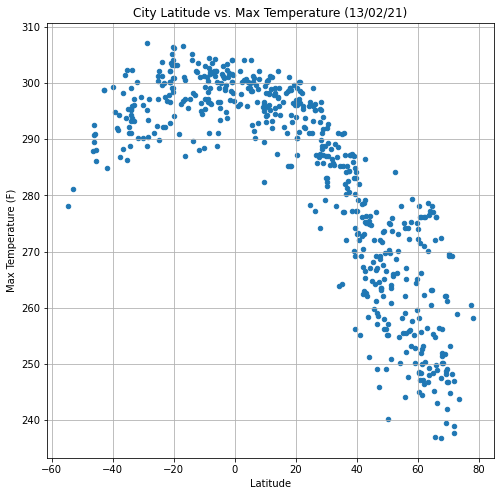

In [130]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="City Latitude vs. Max Temperature (13/02/21)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

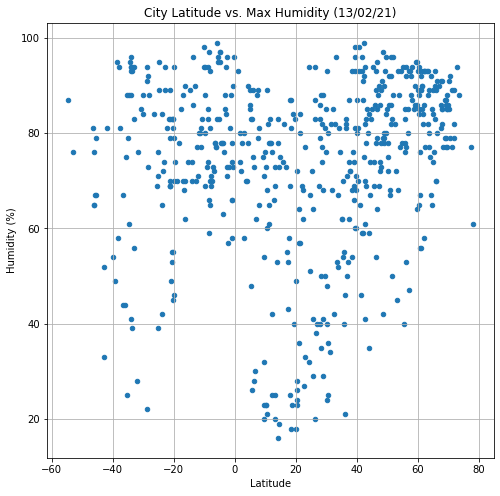

In [132]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="City Latitude vs. Max Humidity (13/02/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

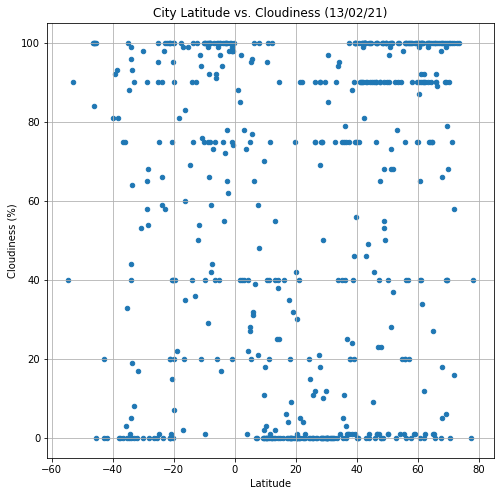

In [134]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="City Latitude vs. Cloudiness (13/02/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

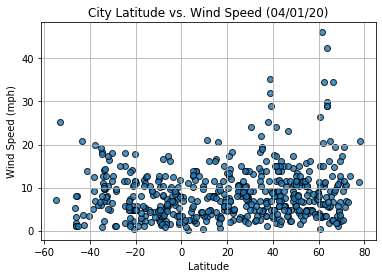

In [13]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="City Latitude vs. Wind Speed (13/02/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [143]:
southern = clean_city_data[clean_city_data['Lat'] < 0]
northern = clean_city_data[clean_city_data['Lat'] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7572232519731519


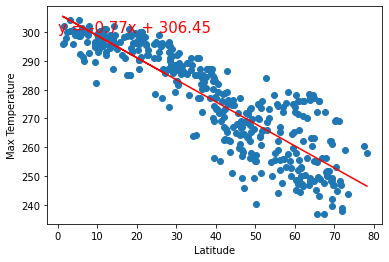

In [157]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern['Lat'].astype('float')
y_values = northern['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,300),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


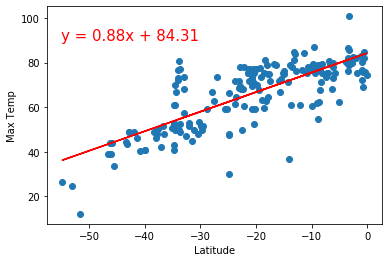

In [26]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern['Lat'].astype('float')
y_values = southern['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,38),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.18187527511972817


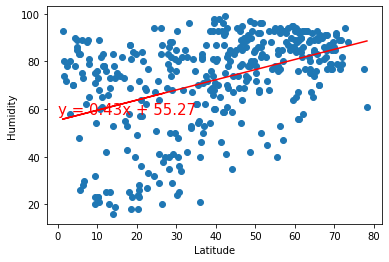

In [154]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern['Lat'].astype('float')
y_values = northern['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,58),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0426367576020735


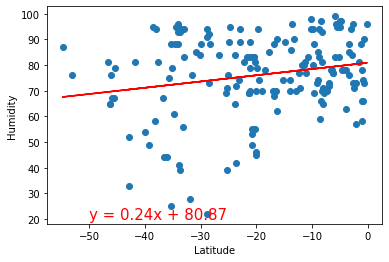

In [159]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern['Lat'].astype('float')
y_values = southern['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.15070377580664715


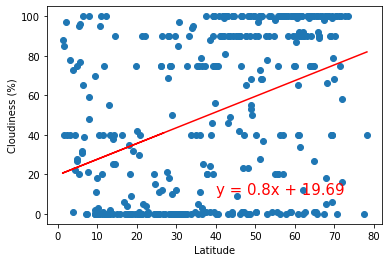

In [160]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern['Lat'].astype('float')
y_values = northern['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.08864407173071819


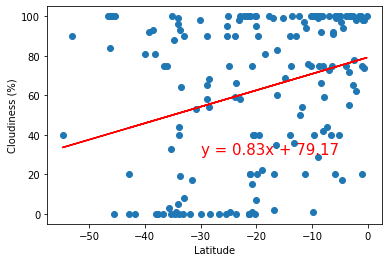

In [161]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern['Lat'].astype('float')
y_values = southern['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.02054894276974015


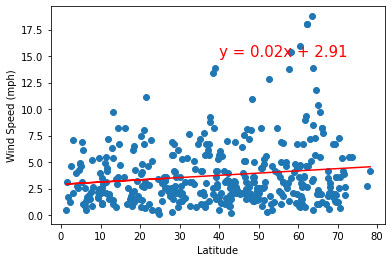

In [163]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern['Lat'].astype('float')
y_values = northern['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0056552138132368885


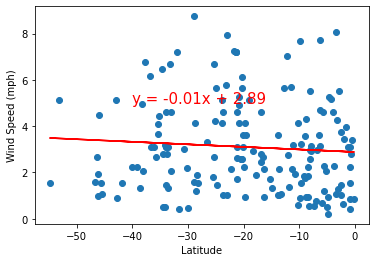

In [166]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern['Lat'].astype('float')
y_values = southern['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()